In [1]:
%load_ext autoreload
%autoreload 2

import torch

import matplotlib.pyplot as plt

from diveslowlearnfast.models import SlowFast, load_checkpoint
from diveslowlearnfast.config import Config
from diveslowlearnfast.visualise.gradcam import GradCAM
from diveslowlearnfast.train import helper as train_helper

cfg = Config()
cfg.DATA.DATASET_PATH = '/Users/youritomassen/Projects/xai/data/Diving48/'
cfg.TRAIN.BATCH_SIZE = 1
device = torch.device('cpu')
model = SlowFast(cfg)
_, optimiser, *_ = train_helper.get_train_objects(cfg, model)
model, *_ = load_checkpoint(model, optimiser, '../misc/checkpoint.pth', device)
gc = GradCAM(model, ['head/pathway0_avgpool', 'head/pathway1_avgpool'], cfg.DATA.MEAN, cfg.DATA.STD, colormap='jet')

test_loader = train_helper.get_test_objects(cfg)

In [3]:
x, y, *_ = next(iter(test_loader))

x.shape, y.shape

(torch.Size([1, 3, 32, 256, 256]), torch.Size([1]))

In [26]:
x_fast = x[:]
# reduce the number of frames by the alpha ratio
# B x C x T / alpha x H x W
x_slow = x[:, :, ::cfg.SLOWFAST.ALPHA]
maps, grads = gc([x_slow, x_fast], y)

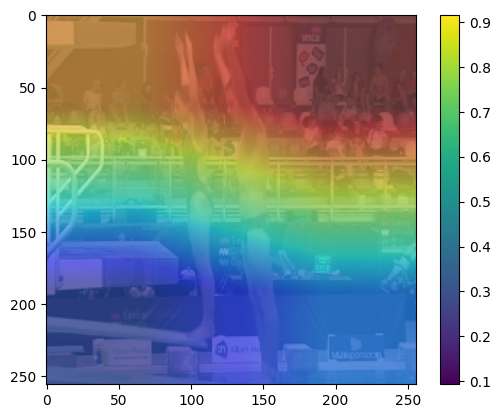

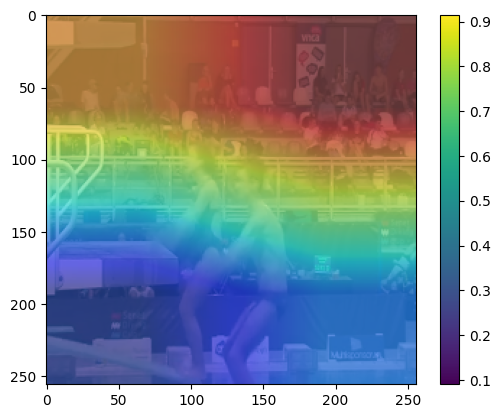

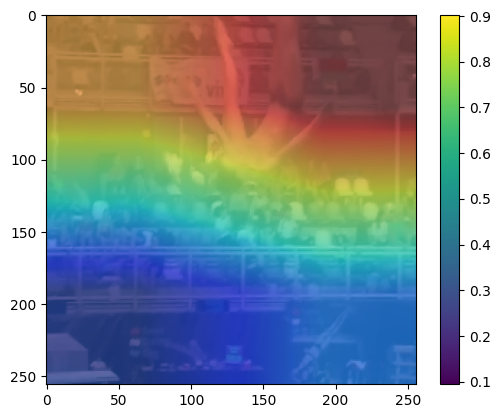

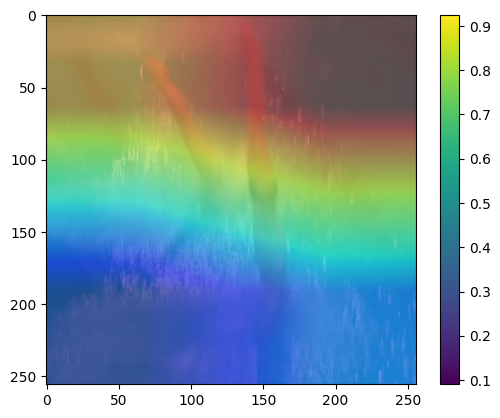

In [27]:
for map in maps[0][0]:
    plt.imshow(map.detach().numpy().transpose(1, 2, 0))
    plt.colorbar()
    plt.show()